# Задача 7. Матрица евклидовых расстояний

In [2]:
import task7
import numpy as np
import math
import IPython
from scipy import spatial
import scipy

## Тестирование реализаций с помощью unittest

In [2]:
import unittest

### I вариант - без векторизации

In [22]:
class TestNvec(unittest.TestCase):
    def test_prim(self):
        """ Primitive test to check the correctness of solution"""
        X = np.array([[0, 0, 0, 0],
                      [1, 2, 3, 4],
                      [1, 4, 9, 16]])
        Y = np.array([[1, 2, 3, 4],
                      [0, 0, 0, 0]])

        answer_mat = scipy.spatial.distance.cdist (X, Y)
        np.testing.assert_array_almost_equal(task7.cdst_nvec(X, Y), answer_mat, decimal=10)
        
    def test_mid(self):
        """ Test to check solution on middle-sized data"""
        X = np.array([[100.0*x+y for y in range(100)] for x in range(100)])
        Y = X.T
        answer_mat = scipy.spatial.distance.cdist (X, Y)

        np.testing.assert_array_almost_equal(task7.cdst_nvec(X, Y), answer_mat, decimal=10)
        
    def test_big(self):
        """ Test to check solution on big data"""
        X = np.random.rand (300, 100)
        Y = np.random.rand (400, 100)
        answer_mat = scipy.spatial.distance.cdist (X, Y)

        np.testing.assert_array_almost_equal(task7.cdst_nvec(X, Y), answer_mat, decimal=10)

In [23]:
test_nvec = TestNvec()
suite_nvec = unittest.TestLoader().loadTestsFromModule(test_nvec)
print (unittest.TextTestRunner().run(suite_nvec))

...

<unittest.runner.TextTestResult run=3 errors=0 failures=0>



----------------------------------------------------------------------
Ran 3 tests in 12.133s

OK


### II вариант - с векторизацией

In [24]:
class TestVec(unittest.TestCase):
    def test_prim(self):
        """ Primitive test to check the correctness of solution"""
        X = np.array([[0, 0, 0, 0],
                      [1, 2, 3, 4],
                      [1, 4, 9, 16]])
        Y = np.array([[1, 2, 3, 4],
                      [0, 0, 0, 0]])

        answer_mat = scipy.spatial.distance.cdist (X, Y)
        np.testing.assert_array_almost_equal(task7.cdst_vec(X, Y), answer_mat, decimal=10)
        
    def test_mid(self):
        """ Test to check solution on middle-sized data"""
        X = np.array([[100.0*x+y for y in range(100)] for x in range(100)])
        Y = X.T
        answer_mat = scipy.spatial.distance.cdist (X, Y)

        np.testing.assert_array_almost_equal(task7.cdst_vec(X, Y), answer_mat, decimal=10)
        
    def test_big(self):
        """ Test to check solution on big data"""
        X = np.random.rand (300, 100)
        Y = np.random.rand (400, 100)
        answer_mat = scipy.spatial.distance.cdist (X, Y)

        np.testing.assert_array_almost_equal(task7.cdst_vec(X, Y), answer_mat, decimal=10)

In [25]:
test_vec = TestVec()
suite_vec = unittest.TestLoader().loadTestsFromModule(test_vec)
print (unittest.TextTestRunner().run(suite_vec))

...
----------------------------------------------------------------------
Ran 3 tests in 0.048s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>


### III вариант - гибридная реализация

In [26]:
class TestHybr(unittest.TestCase):
    def test_prim(self):
        """ Primitive test to check the correctness of solution"""
        X = np.array([[0, 0, 0, 0],
                      [1, 2, 3, 4],
                      [1, 4, 9, 16]])
        Y = np.array([[1, 2, 3, 4],
                      [0, 0, 0, 0]])

        answer_mat = scipy.spatial.distance.cdist (X, Y)
        np.testing.assert_array_almost_equal(task7.cdst_hybr(X, Y), answer_mat, decimal=12)
        
    def test_mid(self):
        """ Test to check solution on middle-sized data"""
        X = np.array([[100.0*x+y for y in range(100)] for x in range(100)])
        Y = X.T
        answer_mat = scipy.spatial.distance.cdist (X, Y)

        np.testing.assert_array_almost_equal(task7.cdst_hybr(X, Y), answer_mat, decimal=12)
        
    def test_big(self):
        """ Test to check solution on big data"""
        X = np.random.rand (300, 100)
        Y = np.random.rand (400, 100)
        answer_mat = scipy.spatial.distance.cdist (X, Y)

        np.testing.assert_array_almost_equal(task7.cdst_hybr(X, Y), answer_mat, decimal=12)

In [28]:
test_hybr = TestHybr()
suite_hybr = unittest.TestLoader().loadTestsFromModule(test_hybr)
print (unittest.TextTestRunner().run(suite_hybr))

...

<unittest.runner.TextTestResult run=3 errors=0 failures=0>



----------------------------------------------------------------------
Ran 3 tests in 1.481s

OK


## Дискретные тесты (на основе тестов из unittest)

### I вариант - без векторизации

In [3]:
X = np.array([[0, 0, 0, 0],
              [1, 2, 3, 4],
              [1, 4, 9, 16]])
Y = np.array([[1, 2, 3, 4],
              [0, 0, 0, 0]])

%timeit cdst_nvec(X, Y)

X = np.array([[100.0*x+y for y in range(100)] for x in range(100)])
Y = X.T
%timeit cdst_nvec(X, Y)

rX = np.random.rand (300, 100)
rY = np.random.rand (400, 100)
%timeit cdst_nvec(rX, rY)



10000 loops, best of 3: 57.8 µs per loop
1 loop, best of 3: 986 ms per loop
1 loop, best of 3: 12.1 s per loop


### II вариант - с векторизацией

In [5]:
X = np.array([[0, 0, 0, 0],
              [1, 2, 3, 4],
              [1, 4, 9, 16]])
Y = np.array([[1, 2, 3, 4],
              [0, 0, 0, 0]])

%timeit cdst_vec(X, Y)

X = np.array([[100.0*x+y for y in range(100)] for x in range(100)])
Y = X.transpose()
%timeit cdst_vec(X, Y)

%timeit cdst_vec(rX, rY)

The slowest run took 8.68 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 55.2 µs per loop
The slowest run took 61.54 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 306 µs per loop
100 loops, best of 3: 4.18 ms per loop


### III вариант - гибридная реализация

In [7]:
X = np.array([[0, 0, 0, 0],
              [1, 2, 3, 4],
              [1, 4, 9, 16]])
Y = np.array([[1, 2, 3, 4],
              [0, 0, 0, 0]])

%timeit cdst_hybr(X, Y)

X = np.array([[100.0*x+y for y in range(100)] for x in range(100)])
Y = X.transpose()
%timeit cdst_hybr(X, Y)

%timeit cdst_hybr(rX, rY)

10000 loops, best of 3: 78.5 µs per loop
10 loops, best of 3: 123 ms per loop
1 loop, best of 3: 1.25 s per loop


### IV вариант - стандартная функция библиотеки SciPy

In [8]:
X = np.array([[0, 0, 0, 0],
              [1, 2, 3, 4],
              [1, 4, 9, 16]])
Y = np.array([[1, 2, 3, 4],
              [0, 0, 0, 0]])

%timeit scipy.spatial.distance.cdist (X, Y)

X = np.array([[100.0*x+y for y in range(100)] for x in range(100)])
Y = X.transpose()
%timeit scipy.spatial.distance.cdist (X, Y)

%timeit scipy.spatial.distance.cdist (rX, rY)

The slowest run took 4.46 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 23.5 µs per loop
1000 loops, best of 3: 712 µs per loop
100 loops, best of 3: 11.9 ms per loop


## Непрерывные тесты

In [1]:
import time
import matplotlib.pyplot as plt

In [3]:
def get_measures (begin, end, step):
    x_axis = []
    nvec_dots = []
    vec_dots = []
    hybr_dots = []
    scpy_dots = []
    start = time.time()
    
    
    for i in range (begin, end, step):
        X = np.array([[i*x+y for y in range(i)] for x in range(i)]).astype(np.float64)
        Y = X.transpose()
        
        x_axis.append(i)
        
        start = time.time()
        task7.cdst_nvec(X, Y)
        nvec_dots.append(time.time()-start)

        start = time.time()
        task7.cdst_vec(X, Y)
        vec_dots.append(time.time()-start)

        start = time.time()
        task7.cdst_hybr(X, Y)
        hybr_dots.append(time.time()-start)
        
        start = time.time()
        scipy.spatial.distance.cdist(X, Y)
        scpy_dots.append(time.time()-start)
    
    return (x_axis, nvec_dots, vec_dots, hybr_dots, scpy_dots)

In [5]:
x_axis, nvec_dots, vec_dots, hybr_dots, scpy_dots = get_measures (20, 1000, 20)

plt.plot(x_axis, nvec_dots, "r-", label="non-vectorized", antialiased=False)
plt.plot(x_axis, vec_dots, "g-", label="vectorized", antialiased=False)
plt.plot(x_axis, hybr_dots, "b-", label="hybrid", antialiased=False)
plt.plot(x_axis, hybr_dots, "k-", label="scipy", antialiased=False)
plt.xlabel("matrix size")
plt.ylabel("time(sec)")
plt.legend()
plt.show()

KeyboardInterrupt: 

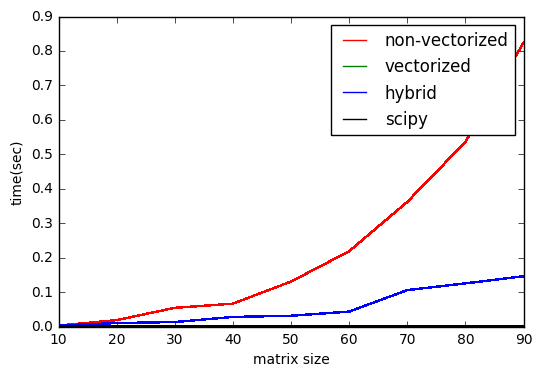

In [11]:
x_axis, nvec_dots, vec_dots, hybr_dots, scpy_dots = get_measures (10, 100, 10)

plt.plot(x_axis, nvec_dots, "r-", label="non-vectorized", antialiased=False)
plt.plot(x_axis, vec_dots, "g-", label="vectorized", antialiased=False)
plt.plot(x_axis, hybr_dots, "b-", label="hybrid", antialiased=False)
plt.plot(x_axis, scpy_dots, "k-", label="scipy", antialiased=False)
plt.xlabel("matrix size")
plt.ylabel("time(sec)")
plt.legend()
plt.show()

In [14]:
def get_ameasures (begin, end, step):
    x_axis = []
    vec_dots = []
    scpy_dots = []
    start = time.time()
    
    
    for i in range (begin, end, step):
        X = np.array([[i*x+y for y in range(i)] for x in range(i)]).astype(np.float64)
        Y = X.transpose()
        
        x_axis.append(i)
    
        start = time.time()
        task7.cdst_vec(X, Y)
        vec_dots.append(time.time()-start)
    
        start = time.time()
        scipy.spatial.distance.cdist(X, Y)
        scpy_dots.append(time.time()-start)
    
    return (x_axis, vec_dots, scpy_dots)

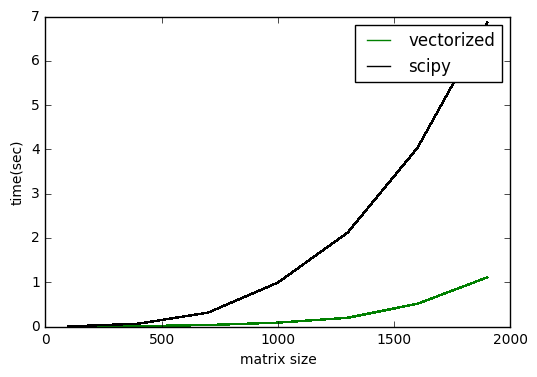

In [17]:
x_axis, vec_dots, scpy_dots = get_ameasures (100, 2000, 300)

plt.plot(x_axis, vec_dots, "g-", label="vectorized", antialiased=False)
plt.plot(x_axis, scpy_dots, "k-", label="scipy", antialiased=False)
plt.xlabel("matrix size")
plt.ylabel("time(sec)")
plt.legend()
plt.show()